In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
df=pd.read_csv('data/beauty.csv',sep=';')


In [10]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [11]:
type(df)

pandas.core.frame.DataFrame

In [13]:
type(df['wage'])

pandas.core.series.Series

In [14]:
df.shape

(1260, 10)

In [15]:
df.columns

Index(['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married',
       'service', 'educ', 'looks'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
wage        1260 non-null float64
exper       1260 non-null int64
union       1260 non-null int64
goodhlth    1260 non-null int64
black       1260 non-null int64
female      1260 non-null int64
married     1260 non-null int64
service     1260 non-null int64
educ        1260 non-null int64
looks       1260 non-null int64
dtypes: float64(1), int64(9)
memory usage: 98.5 KB


In [17]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


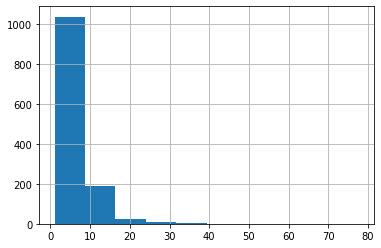

In [22]:
df['wage'].hist()

plt.figure(figsize=(10,10))
df.hist();

In [33]:
df['female'].unique()

array([1, 0])

In [34]:
df['female'].nunique()

2

In [35]:
df['female'].value_counts()

0    824
1    436
Name: female, dtype: int64

In [37]:
df['looks'].unique()

array([4, 3, 2, 5, 1])

In [38]:
df['goodhlth'].mean()

0.9333333333333333

In [42]:
df['goodhlth'].value_counts(normalize=True)

1    0.933333
0    0.066667
Name: goodhlth, dtype: float64

#### Indexing the data

##### .iloc (~numPy arrays)

In [46]:
type(df.iloc[1,1])

numpy.int64

In [45]:
df.iloc[0,:]

wage         5.73
exper       30.00
union        0.00
goodhlth     1.00
black        0.00
female       1.00
married      1.00
service      1.00
educ        14.00
looks        4.00
Name: 0, dtype: float64

In [48]:
toy_df=pd.DataFrame({'age':[28,22,26],
                     'salary':[35,56,99]},index=['kate','leo','max'])

In [49]:
toy_df

,age,salary
kate,28,35
leo,22,56
max,26,99


In [50]:
toy_df.iloc[1,1]

56

#### .loc (~pandas method)

In [52]:
toy_df.loc[['leo','max'],'age']

leo    22
max    26
Name: age, dtype: int64

In [53]:
df.loc[:5,'married']

0    1
1    1
2    0
3    1
4    1
5    1
Name: married, dtype: int64

### Boolean Indexing

In [54]:
(df['wage']>40).sum()

2

In [55]:
df[df['wage']>35]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
602,77.72,9,1,1,1,1,1,1,13,4


In [56]:
(df['exper']!=0).sum()

1256

In [63]:
df[(df['wage']>20)&(df['female']==1)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4


In [67]:
((df['black']==1)&(df['looks']==4)).value_counts()

False    1233
True       27
dtype: int64

In [68]:
((df['black']==1)&(df['looks']==4)).sum()

27

### Apply

In [69]:
def gender_id_to_str(gender_id):
    return 'female' if gender_id==1 else 'male'

In [70]:
df['female'].head()

0    1
1    1
2    1
3    0
4    0
Name: female, dtype: int64

In [71]:
df['female'].apply(gender_id_to_str).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [73]:
df['goodhlth'].apply(lambda rate:'healthy' if rate==1 else 'unhealthy').head()

0    healthy
1    healthy
2    healthy
3    healthy
4    healthy
Name: goodhlth, dtype: object

In [79]:
df['looks'].apply(lambda rating:'ugly'if rating==1 else ('normal' if rating==2 else('pretty' if rating==3 else
                                                     ('beautiful'  if rating==4 else 'awesome')))).head()

0    beautiful
1       pretty
2    beautiful
3       pretty
4       pretty
Name: looks, dtype: object

In [80]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


## Map

In [81]:
df['female'].map({0:'male',1:'female'}).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [82]:
df['looks'].map({1:'ugly',2:'normal',3:'pretty',4:'beautiful',5:'awesome'}).head(10)

0    beautiful
1       pretty
2    beautiful
3       pretty
4       pretty
5       pretty
6       pretty
7    beautiful
8       pretty
9       pretty
Name: looks, dtype: object

In [83]:
(df['looks']==5).value_counts()

False    1241
True       19
Name: looks, dtype: int64

## GroupBy

In [84]:
for (gender_id,sub_df) in df.groupby('female'):
    print('the wage for {} is {}'.format('men' if gender_id==0 else 'women',sub_df['wage'].median()))

the wage for men is 6.41
the wage for women is 3.75


In [85]:
df.groupby('female')['wage'].median()

female
0    6.41
1    3.75
Name: wage, dtype: float64

In [87]:
df.groupby('goodhlth')['wage'].median()

goodhlth
0    4.765
1    5.310
Name: wage, dtype: float64

In [88]:
df.groupby('goodhlth')['wage'].mean()

goodhlth
0    6.188929
1    6.315102
Name: wage, dtype: float64

In [91]:
df.groupby(['female','married'])['wage'].median()

female  married
0       0          5.065
        1          6.710
1       0          3.890
        1          3.580
Name: wage, dtype: float64

## Crosstab

In [92]:
pd.crosstab(df['female'],df['married'])

married,0,1
female,,
0,166,658
1,223,213


In [93]:
pd.crosstab(df['union'],df['goodhlth'])

goodhlth,0,1
union,,
0,58,859
1,26,317


In [95]:
pd.crosstab(df['goodhlth'],df['looks'])

looks,1,2,3,4,5
goodhlth,,,,,
0,2,9,57,16,0
1,11,133,665,348,19


In [96]:
import seaborn as sns

In [97]:
df['educ'].unique()

array([14, 12, 10, 16, 17, 13,  5,  8])

In [100]:
df['educ'].nunique()

8

In [99]:
df['educ'].value_counts()

12    468
13    246
10    156
17    132
16    121
14     51
8      44
5      42
Name: educ, dtype: int64

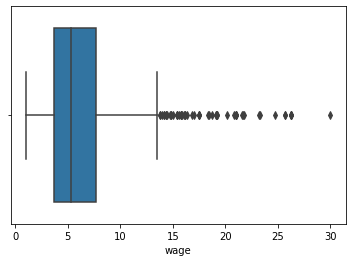

In [108]:
sns.boxplot(x='wage',data=df[df['wage']<30]); #IQR(inter Quartile Range: percent_75 - percent-25)
                                            #the middle line in the box is median
    #IQR is same as STD Deviation as it is not much susceptible to outliers as compared 
                                                                #to mean which is very much susceptible to outliers